## Interval between Pellets

In [1]:
import sys
sys.path.insert(0, '../scripts')

from intervals import graph_pellet_interval, perform_T_test, MannWhitneyUTest
import paths
import intervals as invs
import numpy as np
from preprocessing import read_csv_clean, read_excel_by_sheet

### Control Group

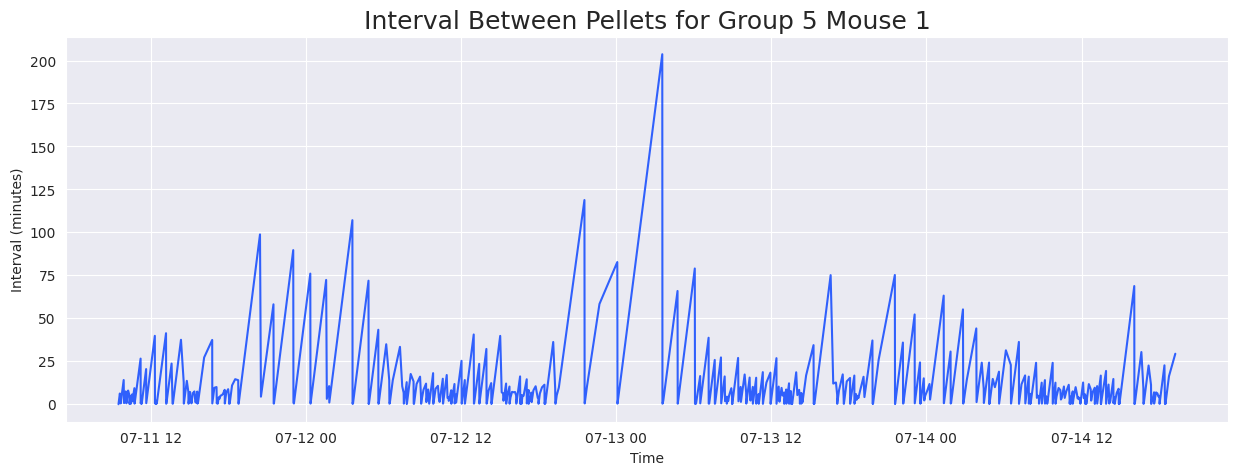

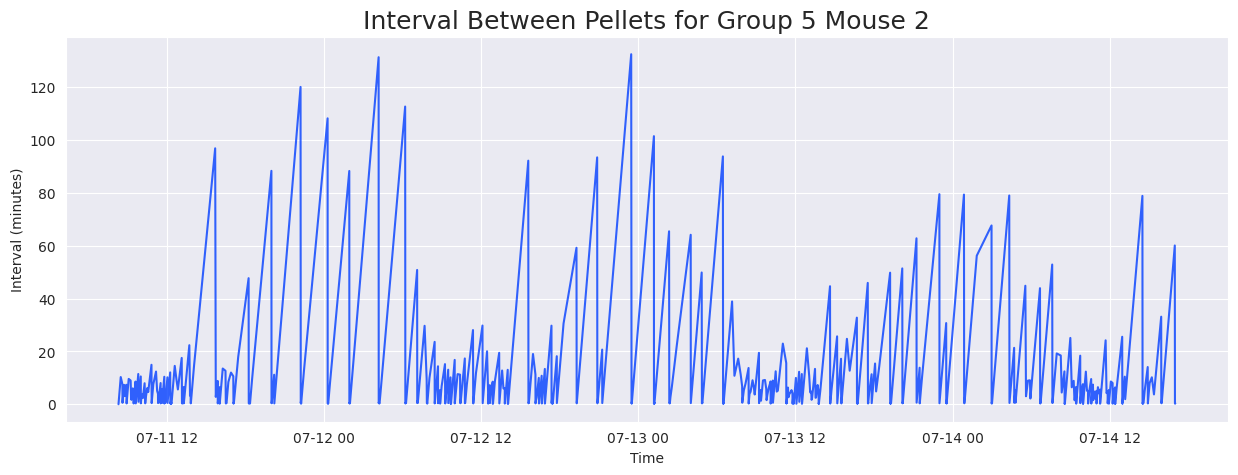

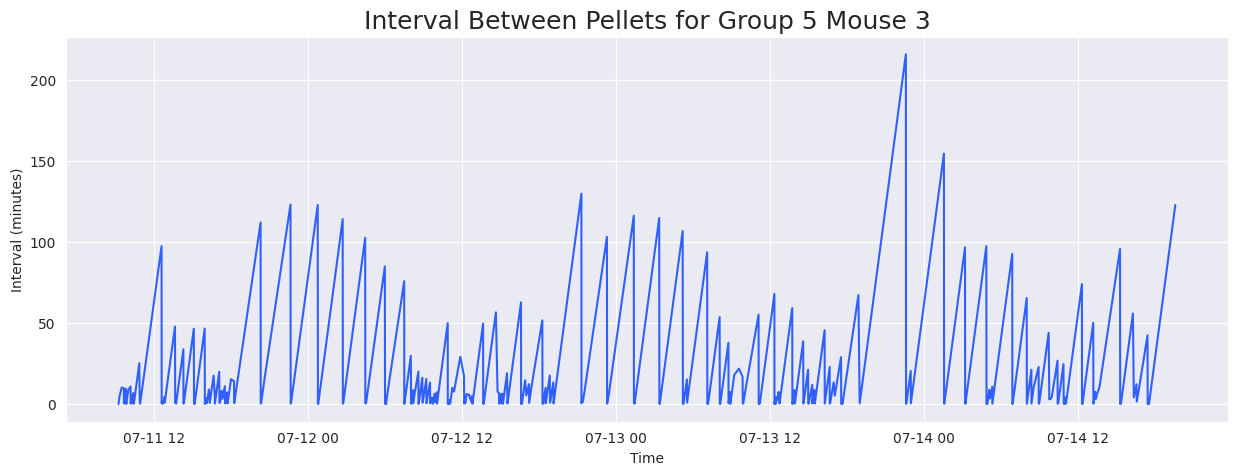

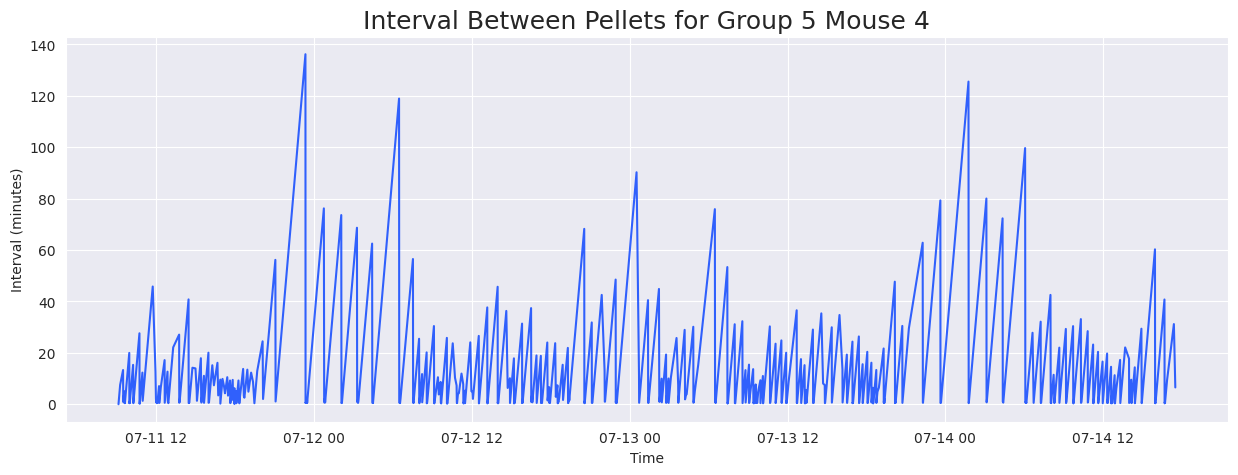

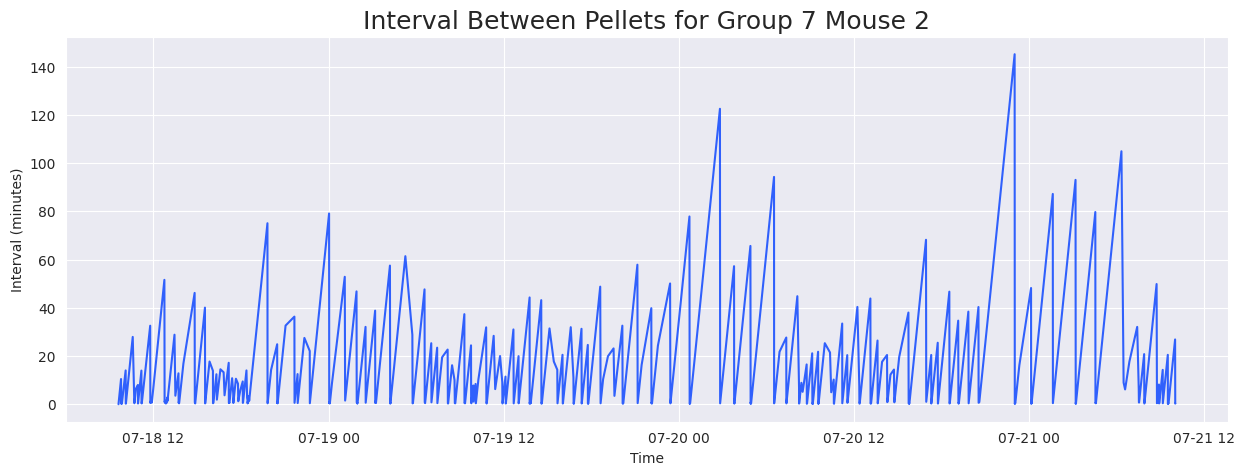

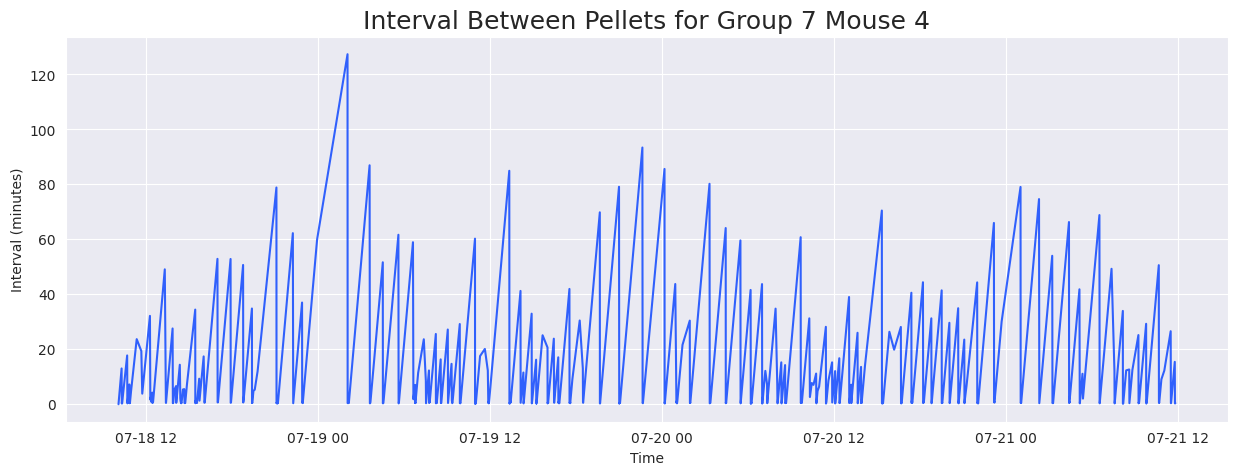

In [2]:
for file in paths.contigency_flip_ctrl:
    graph_pellet_interval(file)

## Experiment Group

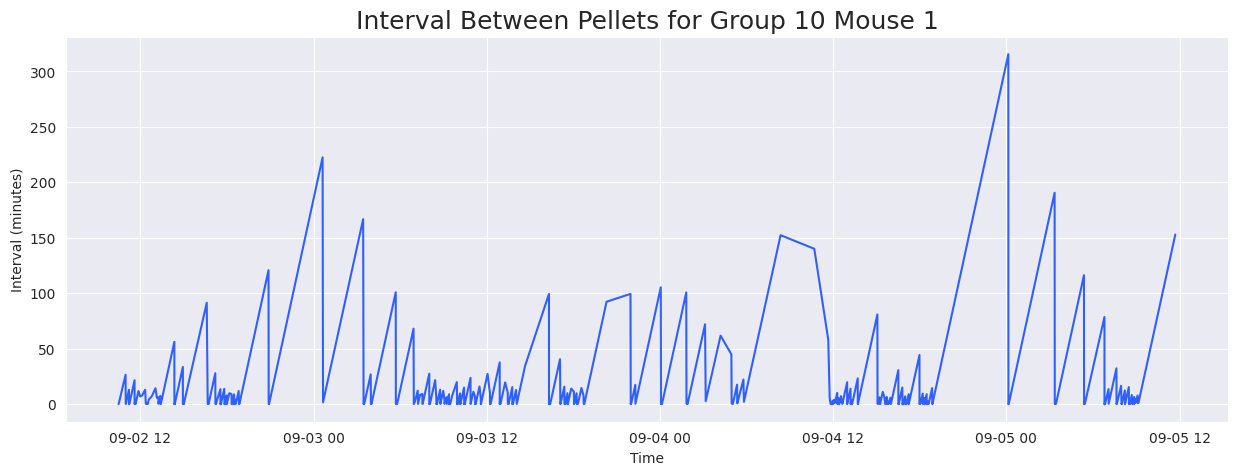

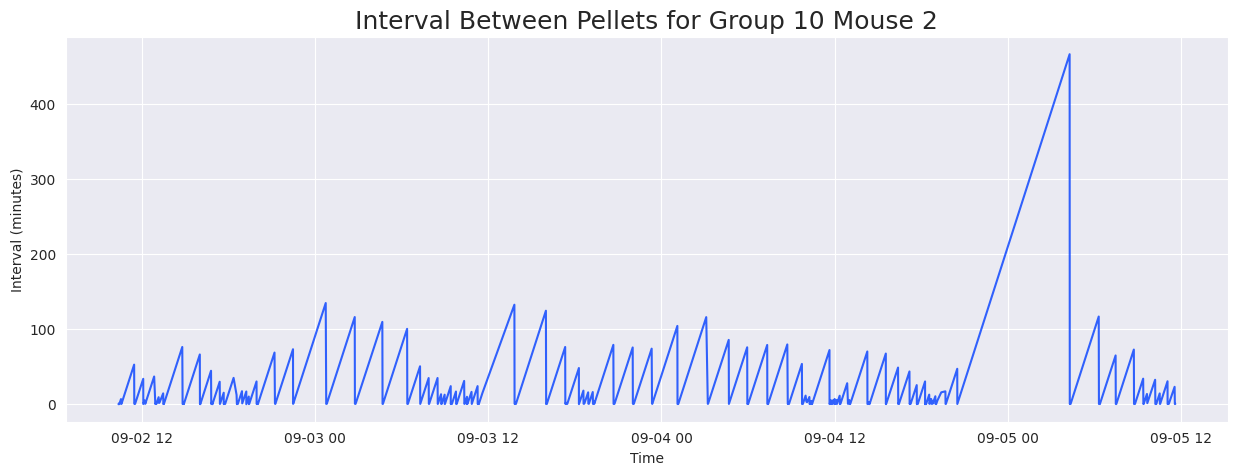

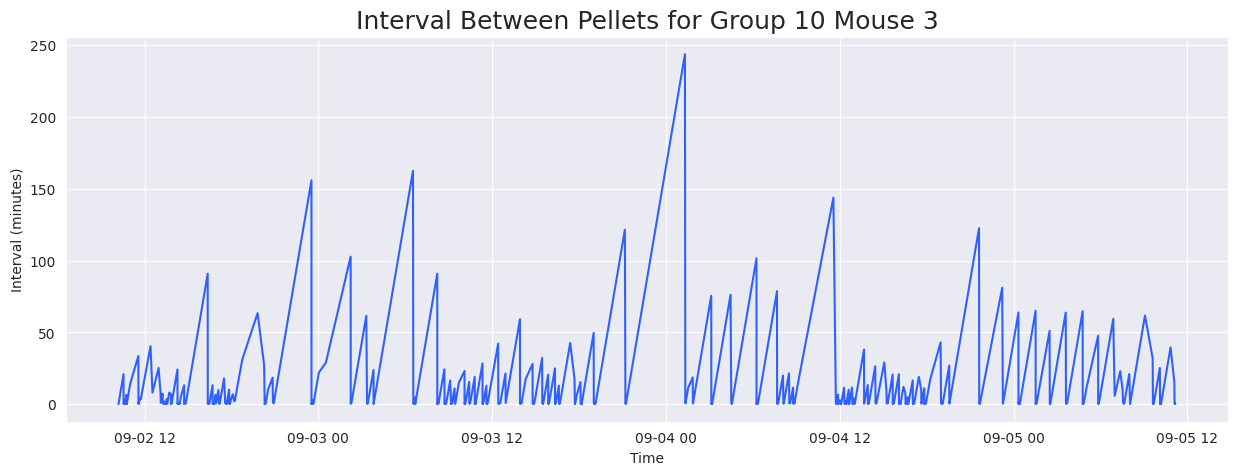

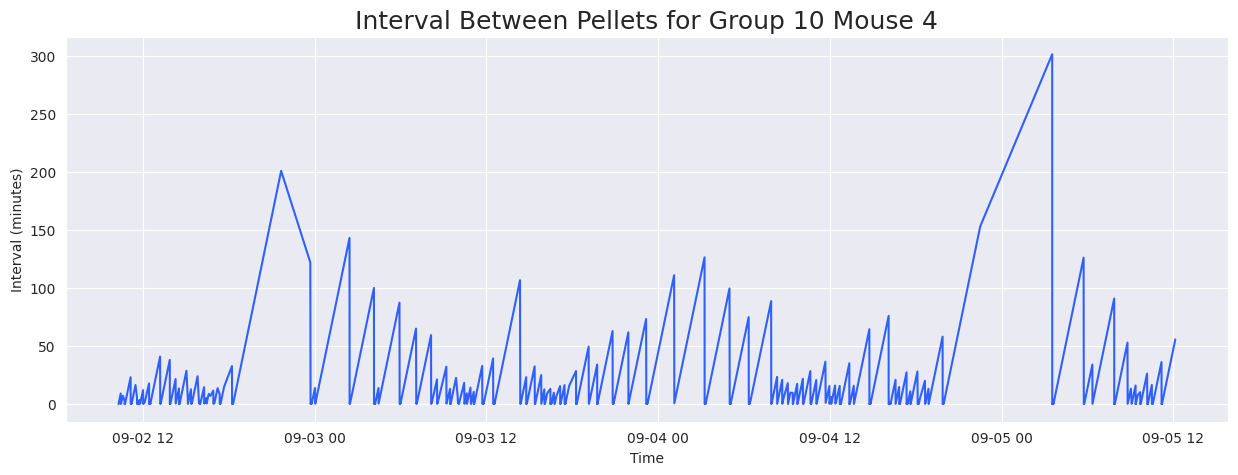

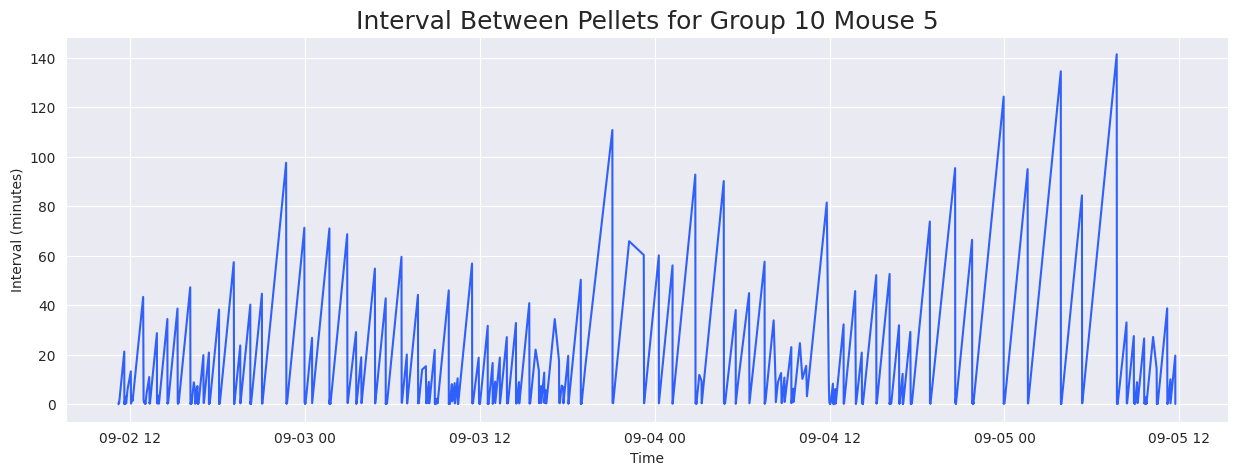

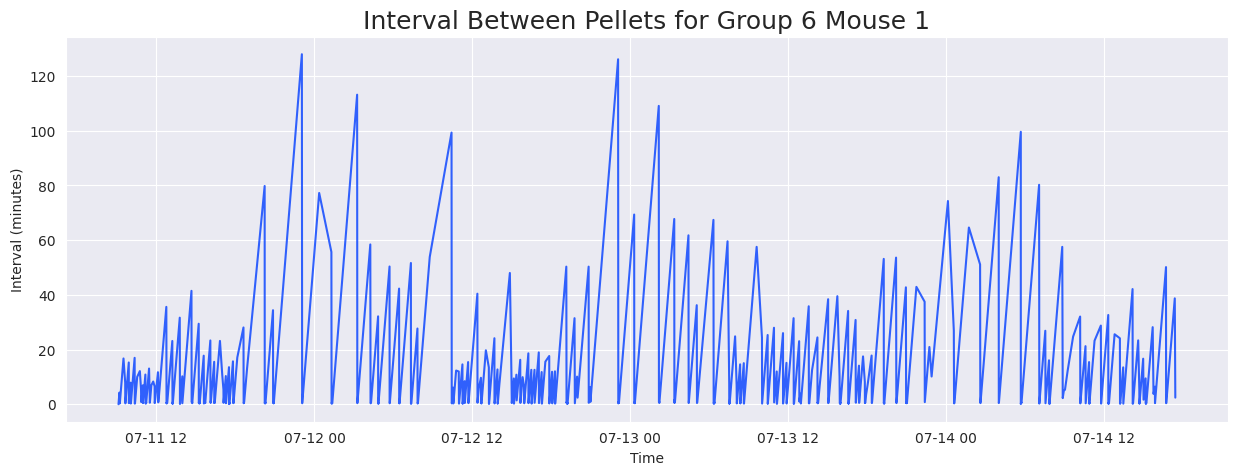

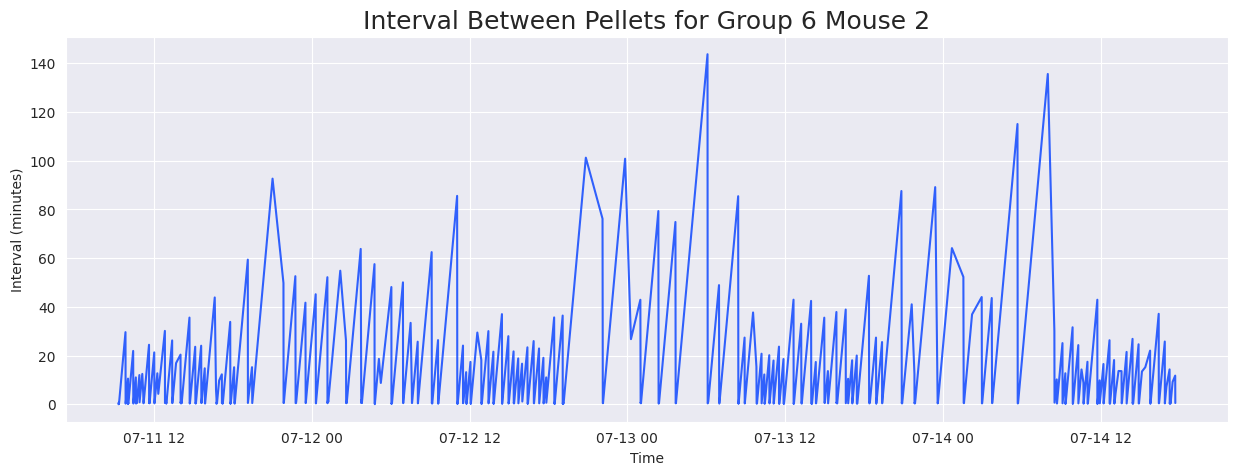

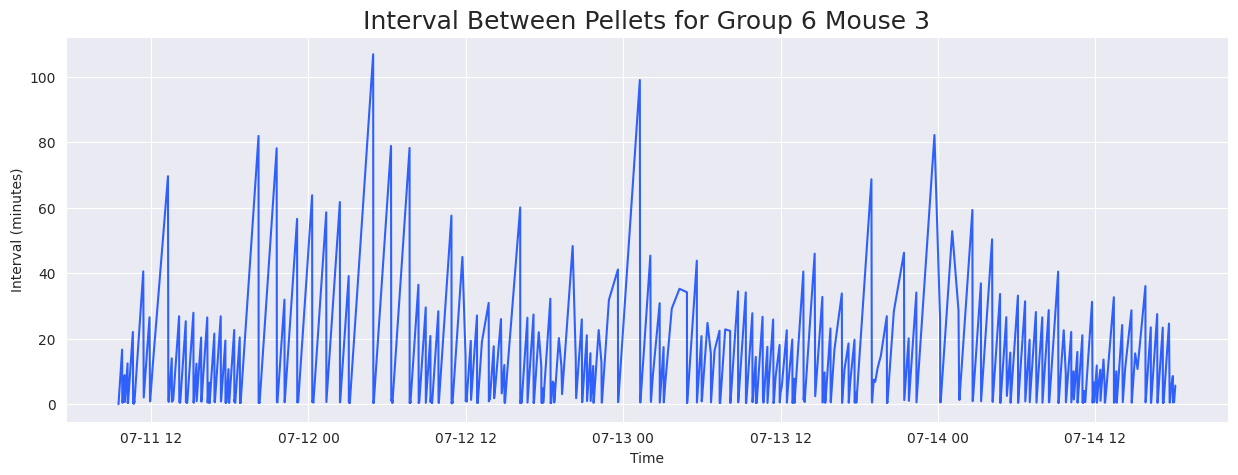

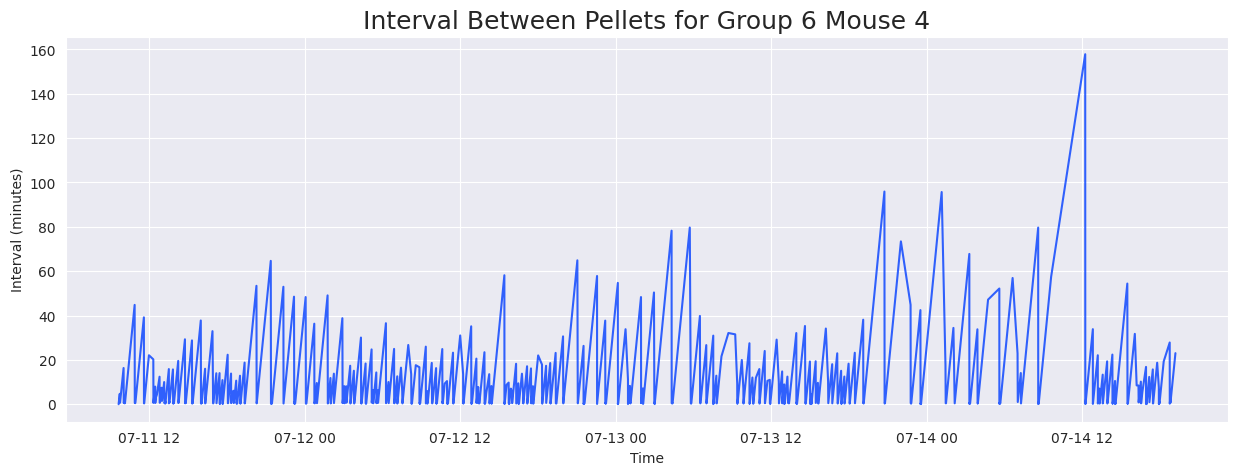

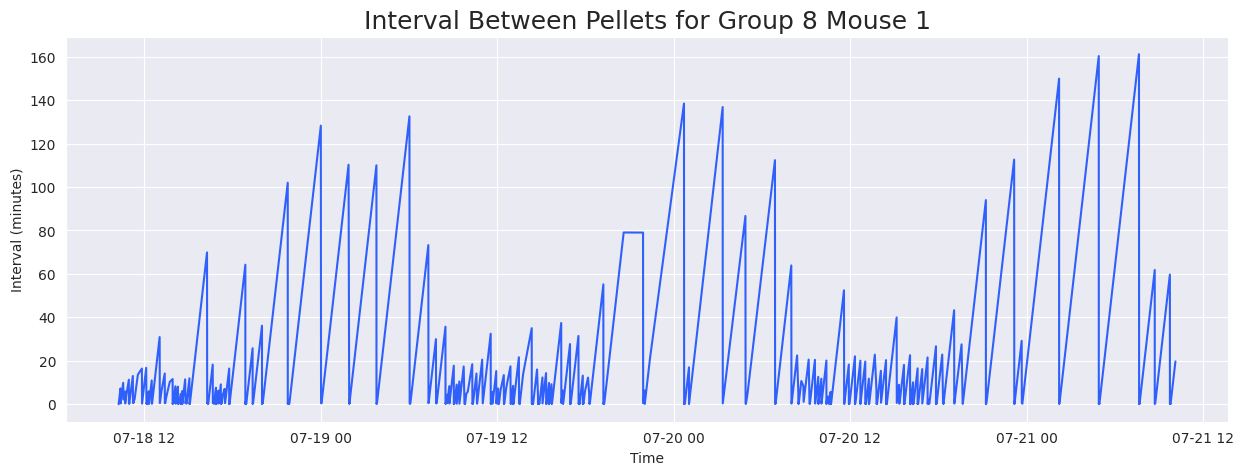

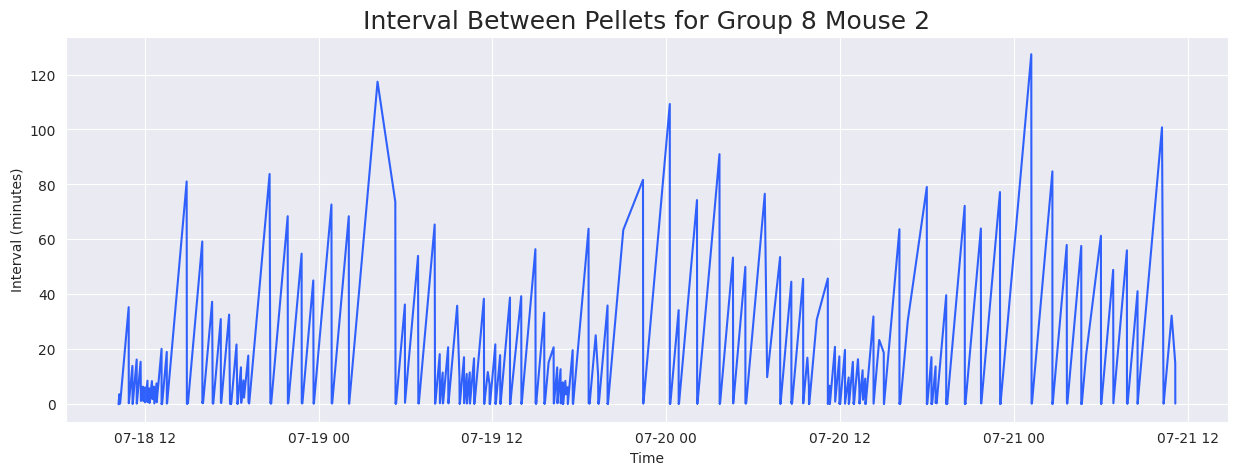

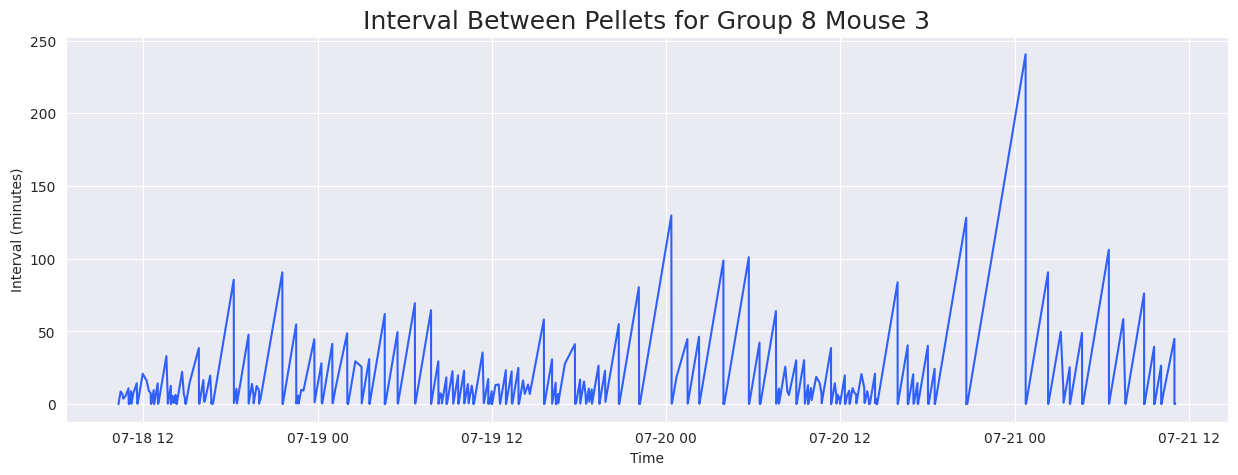

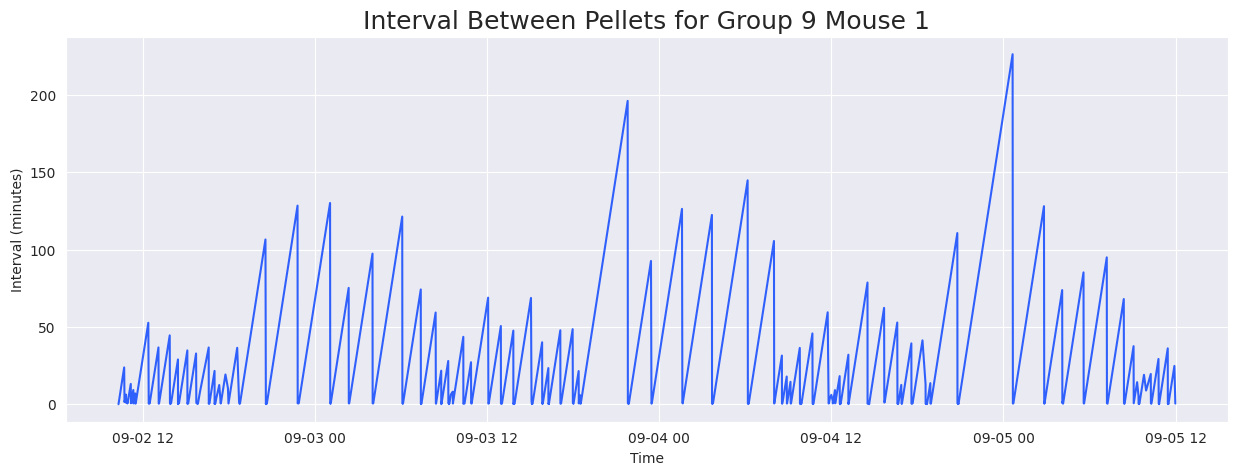

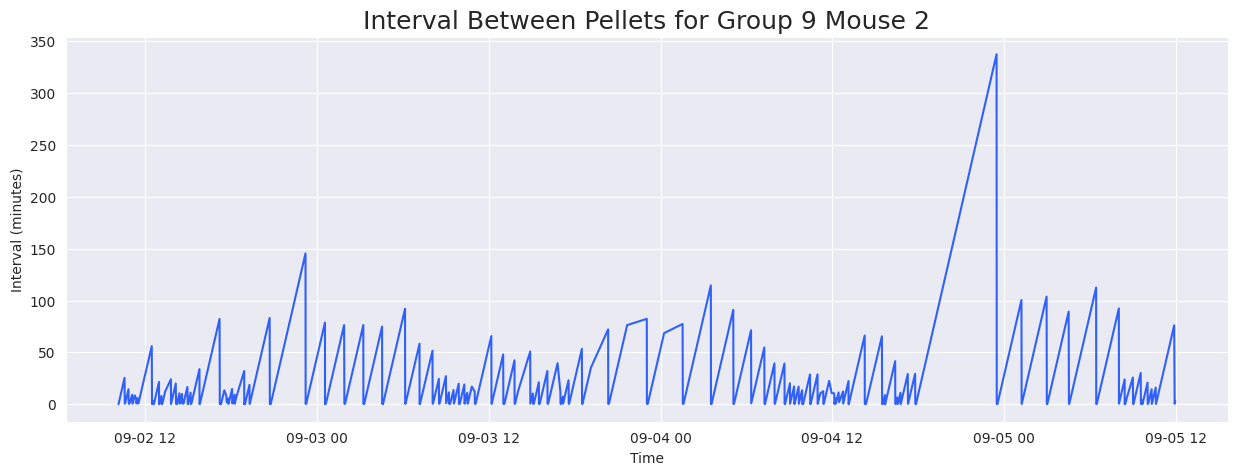

In [3]:
for file in paths.contigency_flip_cask:
    graph_pellet_interval(file)

### Analysis

In [5]:
ctrl_fr1_interval = []
for sheet in paths.fr1_ctrl_sheet:
    data = read_excel_by_sheet(sheet=sheet)
    interval = invs.count_interval(data)
    avg = np.sum(interval) / len(interval)
    ctrl_fr1_interval.append(avg)

cask_fr1_interval = []
for path in paths.fr1_cask_csvs:
    data = read_csv_clean(path)
    interval = invs.count_interval(data)
    avg = np.sum(interval) / len(interval)
    cask_fr1_interval.append(avg)

ctrl_flip_avg = []
for path in paths.contigency_flip_ctrl:
    data = read_csv_clean(path)
    interval = invs.count_interval(data)
    avg = np.sum(interval) / len(interval)
    ctrl_flip_avg.append(avg)

cask_flip_avg = []
for path in paths.contigency_flip_cask:
    data = read_csv_clean(path)
    interval = invs.count_interval(data)
    avg = np.sum(interval) / len(interval)
    cask_flip_avg.append(avg)

Flipping control and flipping cask

In [6]:
invs.perform_T_test(ctrl_flip_avg, cask_flip_avg)

P Value is  0.0007890255050547359
There is a significant difference between the two groups.


FR1 control and FR1 cask

In [7]:
invs.perform_T_test(ctrl_fr1_interval, cask_fr1_interval)

P Value is  0.5616989425381567
There is no significant difference between the two groups.


Control FR1 and Control Reversal

In [8]:
invs.MannWhitneyUTest(ctrl_fr1_interval, ctrl_flip_avg, test_side='greater')

P Value is  0.26244343891402716
There is no significant difference between the two groups.


CASK FR1 and CASK Reversal

In [9]:
invs.perform_T_test(cask_fr1_interval, cask_flip_avg, test_side='less')

P Value is  0.0053308024227370805
Experiment group is significantly less than control group


* Mice tend to have rest/not seeking food at night